In [12]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data.head()

type                    name  \
0                   Augusto Lisboa       Brunch restaurant   
1  Tiffin Cafe & Restaurant Lisboa       Brunch restaurant   
2                         Crisfama              Restaurant   
3                             Alma  Fine dining restaurant   
4          Restaurant CHULHO & Bar              Restaurant   

                                         description  rating  \
0  Hip brunch eatery serving savory toasts, banan...     4.8   
1                                                NaN     4.9   
2                                                NaN     4.8   
3  High-end restaurant with avant-garde local mea...     4.8   
4                                                NaN     4.9   

           review_count price  \
0  1,032 Google reviews    ££   
1    139 Google reviews    ££   
2    649 Google reviews     £   
3    953 Google reviews  ££££   
4    180 Google reviews   NaN   

                                             address  \
0      Rua Santa M.nha 26, 1100-491 Lisboa, Portugal   
1          R. do Conde 32, 1200-637 Lisboa, Portugal   
2  Rua da Cruz de Santa Apolónia 56, 1100-188 Lis...   
3          R. Anchieta 15, 1200-224 Lisboa, Portugal   
4  R. de São João da Mata 82, 1200-850 Lisboa, Po...   

                                       label  
0     ['Dine-in', 'Takeaway', 'No delivery']  
1        ['Dine-in', 'Takeaway', 'Delivery']  
2     ['Dine-in', 'Takeaway', 'No delivery']  
3  ['Dine-in', 'No takeaway', 'No delivery']  
4        ['Dine-in', 'Takeaway', 'Delivery']

## FUNCTIONS 

In [14]:
def keep_numeric(x):
    return re.sub("[^0-9]", "", x)

In [20]:
def replace_price(x):
    if x == "£":
        return 1
    if x == "££": 
        return 2 
    if x == "£££": 
        return 3 
    if x == "££££": 
        return 4 

In [16]:
#function Long_lat 
def transform_lat(x):
    try:
        geolocator = Nominatim(user_agent="aaaa")
        location = geolocator.geocode(x)
        return (location.latitude)
    except: AttributeError
    pass


def transform_lon(x):
    try:
        geolocator = Nominatim(user_agent="aaaa")
        location = geolocator.geocode(x)
        return (location.longitude)
    except: AttributeError
    pass

In [40]:
#Function labels 
def labels_eat_on_site (x):
    if 'dine-in' in x:
        return 1 
    else: 
        return 0
    
def labels_delivery (x):
    if ('delivery' in x) or ('no-contact delivery' in x):
        return 1
    else: 
        return 0
    
def labels_takeaway (x):
    if ('takeaway' in x):
        return 1
    else: 
        return 0

def labels_drive_thru (x):
    if ('drive-through' in x):
        return 1
    else: 
        return 0
    
def labels_no_del(x):
    if ( 'no delivery' in (x)):
        return 1
    else: 
        return 0    

## Preprocessing of columns

In [46]:
# Importing the data, and basic preprocessing 
data= pd.read_csv("../raw_data/restaurants2 - Copy.csv", header= None)
data=data.rename(columns={0:"Index", 1:"type" , 2:"name", 3:"description", 4:"rating", 5:"review_count", 6: "price", 7:"address", 8:"label"})
data=data.drop(columns='Index') # Check whether to keep it or not 

In [47]:
# Column rating 
data.rating=pd.to_numeric(data.rating, downcast="float")

# Column review_count 
data.review_count=data.review_count.map(keep_numeric)
data.review_count=pd.to_numeric(data.review_count, downcast="float")

#Column price 
data.price = data.price.map(replace_price)

#Adress into latitude and longitude 
data['latitude']=data.address.map(transform_lat)
data['longitude']=data.address.map(transform_lon) # have to do something for all the na 

data.label= data['label'].str.lower()

data['dine_in']=data.label.map(labels_eat_on_site)
data['takeaway']=data.label.map(labels_takeaway)
data['delivery']=data.label.map(labels_delivery)
data['drive_through']=data.label.map(labels_drive_thru)
data['no_del_exp']=data.label.map(labels_no_del)

In [48]:
data.head()

type                    name  \
0                   Augusto Lisboa       Brunch restaurant   
1  Tiffin Cafe & Restaurant Lisboa       Brunch restaurant   
2                         Crisfama              Restaurant   
3                             Alma  Fine dining restaurant   
4          Restaurant CHULHO & Bar              Restaurant   

                                         description  rating  review_count  \
0  Hip brunch eatery serving savory toasts, banan...     4.8        1032.0   
1                                                NaN     4.9         139.0   
2                                                NaN     4.8         649.0   
3  High-end restaurant with avant-garde local mea...     4.8         953.0   
4                                                NaN     4.9         180.0   

   price                                            address  \
0    2.0      Rua Santa M.nha 26, 1100-491 Lisboa, Portugal   
1    2.0          R. do Conde 32, 1200-637 Lisboa, Portugal   
2    1.0  Rua da Cruz de Santa Apolónia 56, 1100-188 Lis...   
3    4.0          R. Anchieta 15, 1200-224 Lisboa, Portugal   
4    NaN  R. de São João da Mata 82, 1200-850 Lisboa, Po...   

                                       label latitude longitude  dine_in  \
0     ['dine-in', 'takeaway', 'no delivery']     None      None        1   
1        ['dine-in', 'takeaway', 'delivery']     None      None        1   
2     ['dine-in', 'takeaway', 'no delivery']     None      None        1   
3  ['dine-in', 'no takeaway', 'no delivery']     None      None        1   
4        ['dine-in', 'takeaway', 'delivery']     None      None        1   

   takeaway  delivery  drive_through  no_del_exp  
0         1         1              0           1  
1         1         1              0           0  
2         1         1              0           1  
3         1         1              0           1  
4         1         1              0           0

In [38]:
data.label.value_counts()

['dine-in', 'takeaway', 'no delivery']                 5
['dine-in', 'no delivery']                             5
['dine-in', 'takeaway', 'delivery']                    4
['dine-in', 'no takeaway', 'no delivery']              3
['dine-in', 'drive-through', 'no-contact delivery']    1
['dine-in', 'takeaway', 'no-contact delivery']         1
['dine-in', 'takeaway']                                1
['dine-in']                                            1
Name: label, dtype: int64

In [379]:
data.head()

name  rating  review_count  \
0                                      Darshan Nepal     4.4         375.0   
1   Chillis Bangladesh Indian Restaurant Curry House     4.1          33.0   
2                Dreams Sushi Restaurant & Take Away     4.1          33.0   
3  Restaurante Santos (Comida de Nepalesa & Portu...     5.0          25.0   
4                    Papa Chidera Nigeria Restaurant     4.6          20.0   

   price                                     address  \
0    2.0          Av. Alm. Reis 48A, 1150-019 Lisboa   
1    2.0       R. do Benformoso 256, 1100-088 Lisboa   
2    2.0            Rua do Zaire 27, 1170-172 Lisboa   
3    2.0  Rua do Forno do Tijolo 60, 1170-138 Lisboa   
4    2.0                             1170-287 Lisboa   

                                               label   latitude  longitude  \
0  ['comer no local', 'com recolha móvel', 'entre...  38.726221  -9.134897   
1                    ['comer no local', 'take away']        NaN        NaN   
2         ['comer no local', 'take away', 'entrega']  38.727935  -9.134149   
3                    ['comer no local', 'take away']        NaN        NaN   
4                    ['comer no local', 'take away'] -34.629451 -58.519968   

   eat_on_site  take_away  delivery  drive_thru  no_delivery  
0            1          1         1           0            0  
1            1          1         0           0            0  
2            1          1         1           0            0  
3            1          1         0           0            0  
4            1          1         0           0            0

## Exploration

(array([ 1.,  2.,  1.,  3.,  5.,  4., 11.,  7.,  5.,  1.]),
 array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

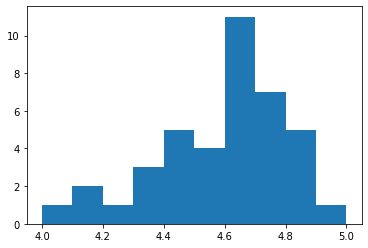

In [246]:
# Repartition of reviews
plt.hist(data.rating)

average number of review per store: 598.675
Some outliers with many reviews: 


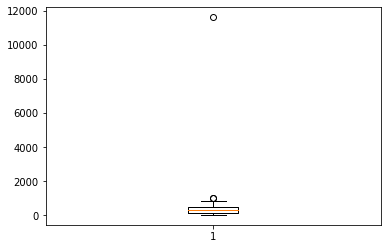

In [250]:
# number of reviews per store: 
plt.boxplot(data.review_count)

print('average number of reviews per store:', data.review_count.mean())
print('Some outliers with many reviews: ')

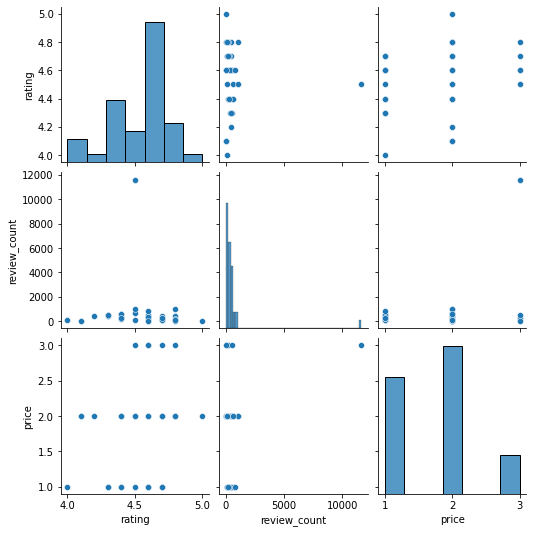

In [260]:
sns.pairplot(data[['rating', 'review_count', 'price']])

### Relationship between number of reviews and review score: 


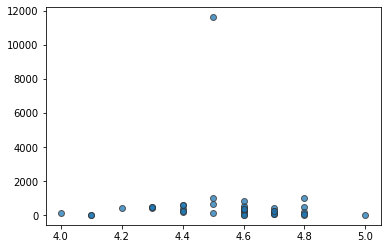

In [251]:
plt.scatter(data.rating, data.review_count,  edgecolor='#333333', alpha=0.75)

## Labels

In [265]:
data.label.value_counts()

['Comer no local', 'Take away', 'Entrega']                         13
['Comer no local', 'Take away']                                    10
['Comer no local', 'Take away', 'Não faz entregas']                 4
['Comer no local', 'Com recolha móvel', 'Entrega']                  3
['Comer no local', 'Não faz entregas']                              3
['Comer no local', 'Com recolha móvel', 'Entrega sem contacto']     2
['Comer no local', 'Take away', 'Entrega sem contacto']             2
['Comer no local', 'Drive-thru']                                    1
['Comer no local', 'Drive-thru', 'Entrega sem contacto']            1
['Comer no local', 'Com recolha móvel']                             1
Name: label, dtype: int64

In [332]:
data.groupby('label').mean()
#regions = countries_df.groupby('Region')

rating  review_count  \
label                                                                        
['comer no local', 'com recolha móvel', 'entreg...  4.550000    391.500000   
['comer no local', 'com recolha móvel', 'entrega']  4.500000    140.000000   
['comer no local', 'com recolha móvel']             4.600000    340.000000   
['comer no local', 'drive-thru', 'entrega sem c...  4.500000  11611.000000   
['comer no local', 'drive-thru']                    4.700000    239.000000   
['comer no local', 'não faz entregas']              4.500000    257.000000   
['comer no local', 'take away', 'entrega sem co...  4.600000    414.500000   
['comer no local', 'take away', 'entrega']          4.507692    330.307678   
['comer no local', 'take away', 'não faz entreg...  4.675000    478.000000   
['comer no local', 'take away']                     4.540000    274.799988   

                                                       price   latitude  \
label                                                                     
['comer no local', 'com recolha móvel', 'entreg...  2.000000  38.726221   
['comer no local', 'com recolha móvel', 'entrega']  1.333333  38.725149   
['comer no local', 'com recolha móvel']             2.000000  38.719890   
['comer no local', 'drive-thru', 'entrega sem c...  3.000000  38.727859   
['comer no local', 'drive-thru']                    1.000000        NaN   
['comer no local', 'não faz entregas']              1.333333  38.716665   
['comer no local', 'take away', 'entrega sem co...  1.000000  38.726978   
['comer no local', 'take away', 'entrega']          1.666667  38.724974   
['comer no local', 'take away', 'não faz entreg...  2.500000        NaN   
['comer no local', 'take away']                     1.800000  -0.967881   

                                                    longitude  
label                                                          
['comer no local', 'com recolha móvel', 'entreg...  -9.134897  
['comer no local', 'com recolha móvel', 'entrega']  -9.135340  
['comer no local', 'com recolha móvel']             -9.142155  
['comer no local', 'drive-thru', 'entrega sem c...  -9.134819  
['comer no local', 'drive-thru']                          NaN  
['comer no local', 'não faz entregas']              -9.132458  
['comer no local', 'take away', 'entrega sem co...  -9.133816  
['comer no local', 'take away', 'entrega']          -9.133941  
['comer no local', 'take away', 'não faz entreg...        NaN  
['comer no local', 'take away']                    -36.285270

In [365]:
data.groupby('no_delivery').mean()
#regions = countries_df.groupby('Region')

rating  review_count   price   latitude  longitude  \
no_delivery                                                         
0            4.533333    644.363647  1.6875  31.282663 -14.225697   
1            4.600000    383.285706  2.0000  38.716665  -9.132458   

             eat_on_site  take_away  delivery  drive_thru  
no_delivery                                                
0                    1.0   0.939394  0.636364    0.060606  
1                    1.0   0.571429  1.000000    0.000000

## Mapping of coordinates of restaurant with folium 

In [252]:
import os 
import folium

In [254]:
data_2=data.dropna()

latlonname= zip(data_2['latitude'],data_2['longitude'], data_2['name'], data_2['price'], data_2['rating'])

m = folium.Map(location=[38.7166,  -9.1483], titles='small businesses', zoom_start=14)

for coord in latlonname:
    folium.Marker(location=[coord[0], coord[1]], popup= (coord[2:5]), fill_color='#43d9de', radius=8 ).add_to(m)
    
m